In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
vehicle_df = pd.read_csv('vehicle.csv')

In [3]:
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

## 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

In [5]:
vehicle_df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

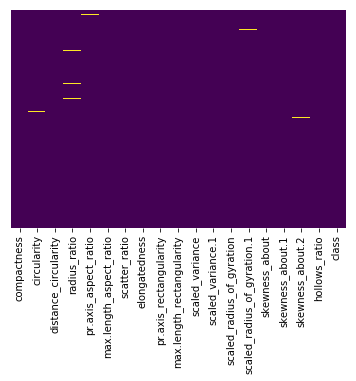

In [6]:
sns.heatmap(vehicle_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
vehicle_df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [8]:
vehicle_df = vehicle_df.replace(np.NaN,vehicle_df.median())

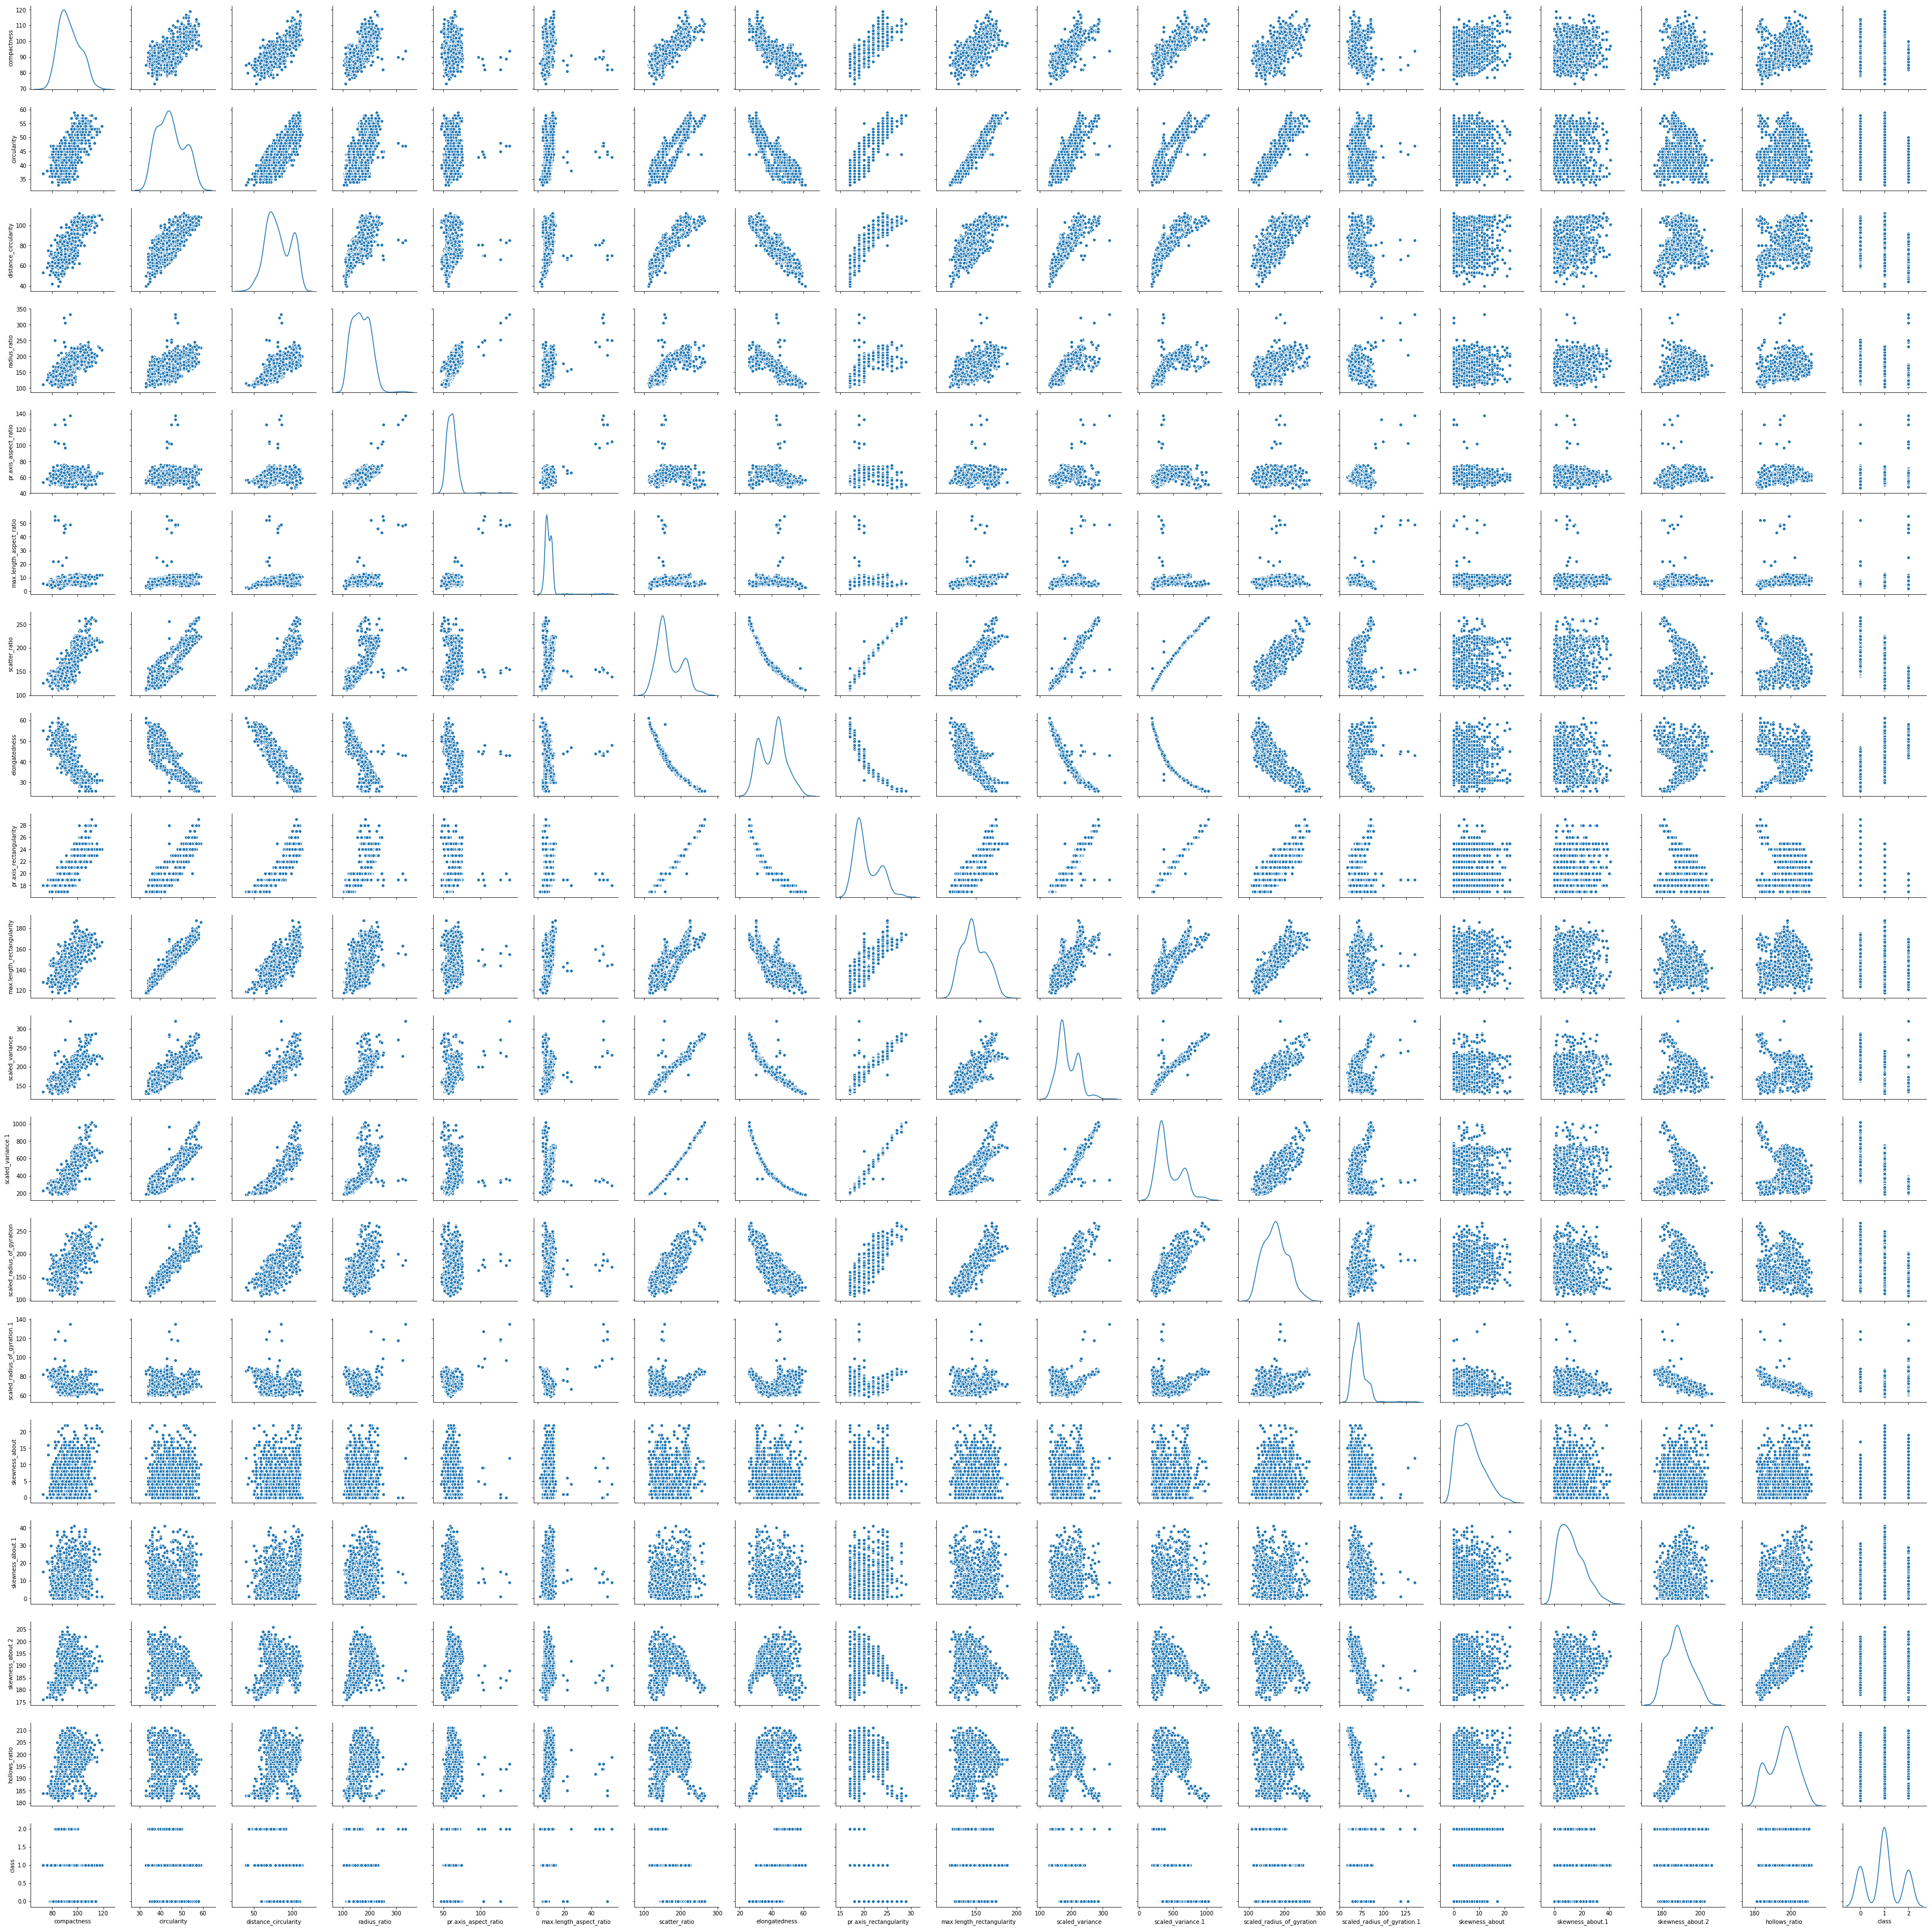

In [49]:
sns.pairplot(vehicle_df, diag_kind='kde')

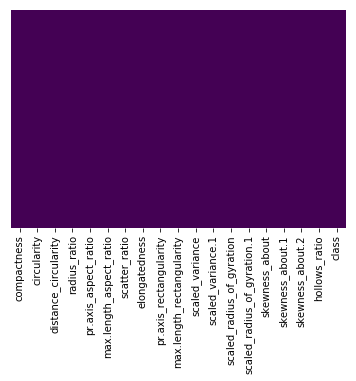

In [9]:
sns.heatmap(vehicle_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
vehicle_df['class'] = le.fit_transform(vehicle_df['class'])

In [12]:
vehicle_df.groupby('class').count()

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
0              218          218                   218           218   
1              429          429                   429           429   
2              199          199                   199           199   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
0                       218                      218            218   
1                       429                      429            429   
2                       199                      199            199   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
0                218                     218                        218   
1                429                     429                        429   
2                199                     199                        199   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
0                  218                218                        218   
1                  429                429                        429   
2                  199                199                        199   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
0                              218             218               218   
1                              429             429               429   
2                              199             199               199   

       skewness_about.2  hollows_ratio  
class                                   
0                   218            218  
1                   429            429  
2                   199            199

In [13]:
vehicle_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    1.00     2.0

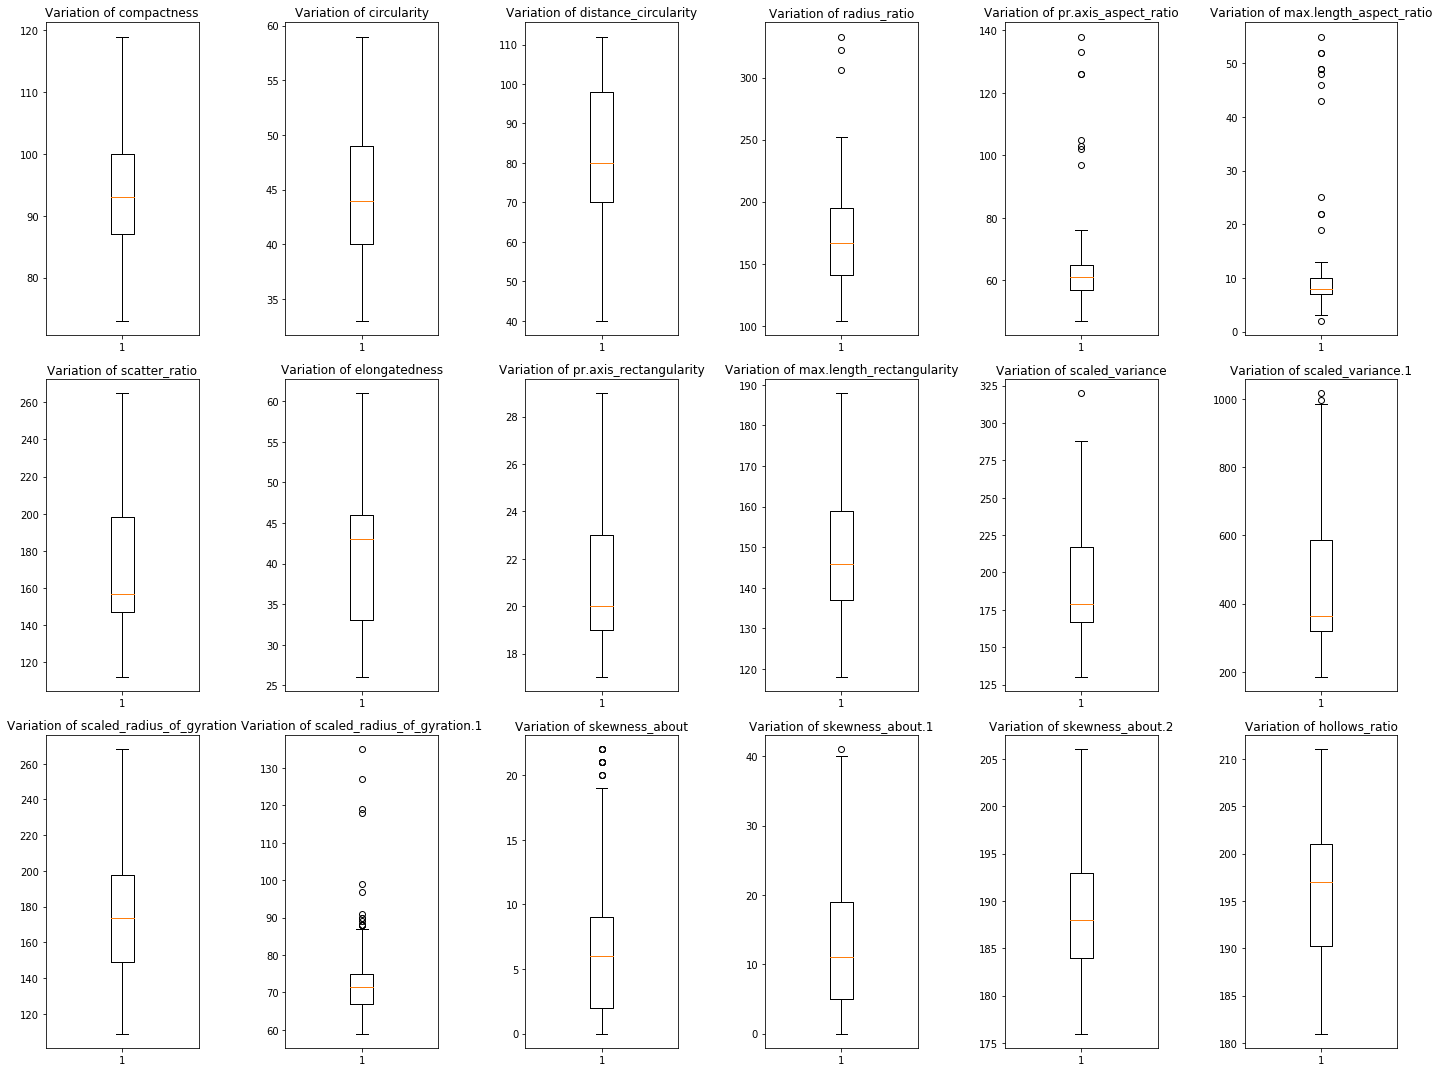

In [14]:
fig,axes=plt.subplots(3,6)
columns =['compactness', 'circularity', 'distance_circularity', 'radius_ratio','pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio','elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',      'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration','scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',       'skewness_about.2', 'hollows_ratio', 'class']
colval = 0
for i in range (3):
    for j in range (6) :
        plot_fld = columns[colval]
        axes[i,j].boxplot(vehicle_df[plot_fld])
        axes[i,j].set_title('Variation of '+plot_fld)
        colval = colval+1
fig=plt.gcf()
fig.set_size_inches(20,15)
fig.tight_layout()

In [15]:
vehicle_Q1 = vehicle_df.quantile(q=.25, axis = 0)
vehicle_Q3 = vehicle_df.quantile(q=.75, axis = 0)
vehicle_IQR = vehicle_Q3 - vehicle_Q1
min_floor = vehicle_Q1 - (1.5 * vehicle_IQR)
max_cap = vehicle_Q3 + (1.5 * vehicle_IQR)

In [16]:
check1 = ((vehicle_df['radius_ratio'] >= min_floor['radius_ratio']) & (vehicle_df['radius_ratio'] <= max_cap['radius_ratio']))
check2 = ((vehicle_df['pr.axis_aspect_ratio'] >= min_floor['pr.axis_aspect_ratio']) & (vehicle_df['pr.axis_aspect_ratio'] <= max_cap['pr.axis_aspect_ratio']))
check3 = ((vehicle_df['max.length_aspect_ratio'] >= min_floor['max.length_aspect_ratio']) & (vehicle_df['max.length_aspect_ratio'] <= max_cap['max.length_aspect_ratio']))
check4 = ((vehicle_df['scaled_variance.1'] >= min_floor['scaled_variance.1']) & (vehicle_df['scaled_variance.1'] <= max_cap['scaled_variance.1']))
check5 = ((vehicle_df['scaled_variance'] >= min_floor['scaled_variance']) & (vehicle_df['scaled_variance'] <= max_cap['scaled_variance']))
check6 = ((vehicle_df['scaled_radius_of_gyration.1'] >= min_floor['scaled_radius_of_gyration.1']) & (vehicle_df['scaled_radius_of_gyration.1'] <= max_cap['scaled_radius_of_gyration.1']))
check7 = ((vehicle_df['skewness_about'] >= min_floor['skewness_about']) & (vehicle_df['skewness_about'] <= max_cap['skewness_about']))
check8 = ((vehicle_df['skewness_about.1'] >= min_floor['skewness_about.1']) & (vehicle_df['skewness_about.1'] <= max_cap['skewness_about.1']))
eda_data = vehicle_df[check1 & check2 & check3 & check4 & check5 & check6 & check7 & check8]

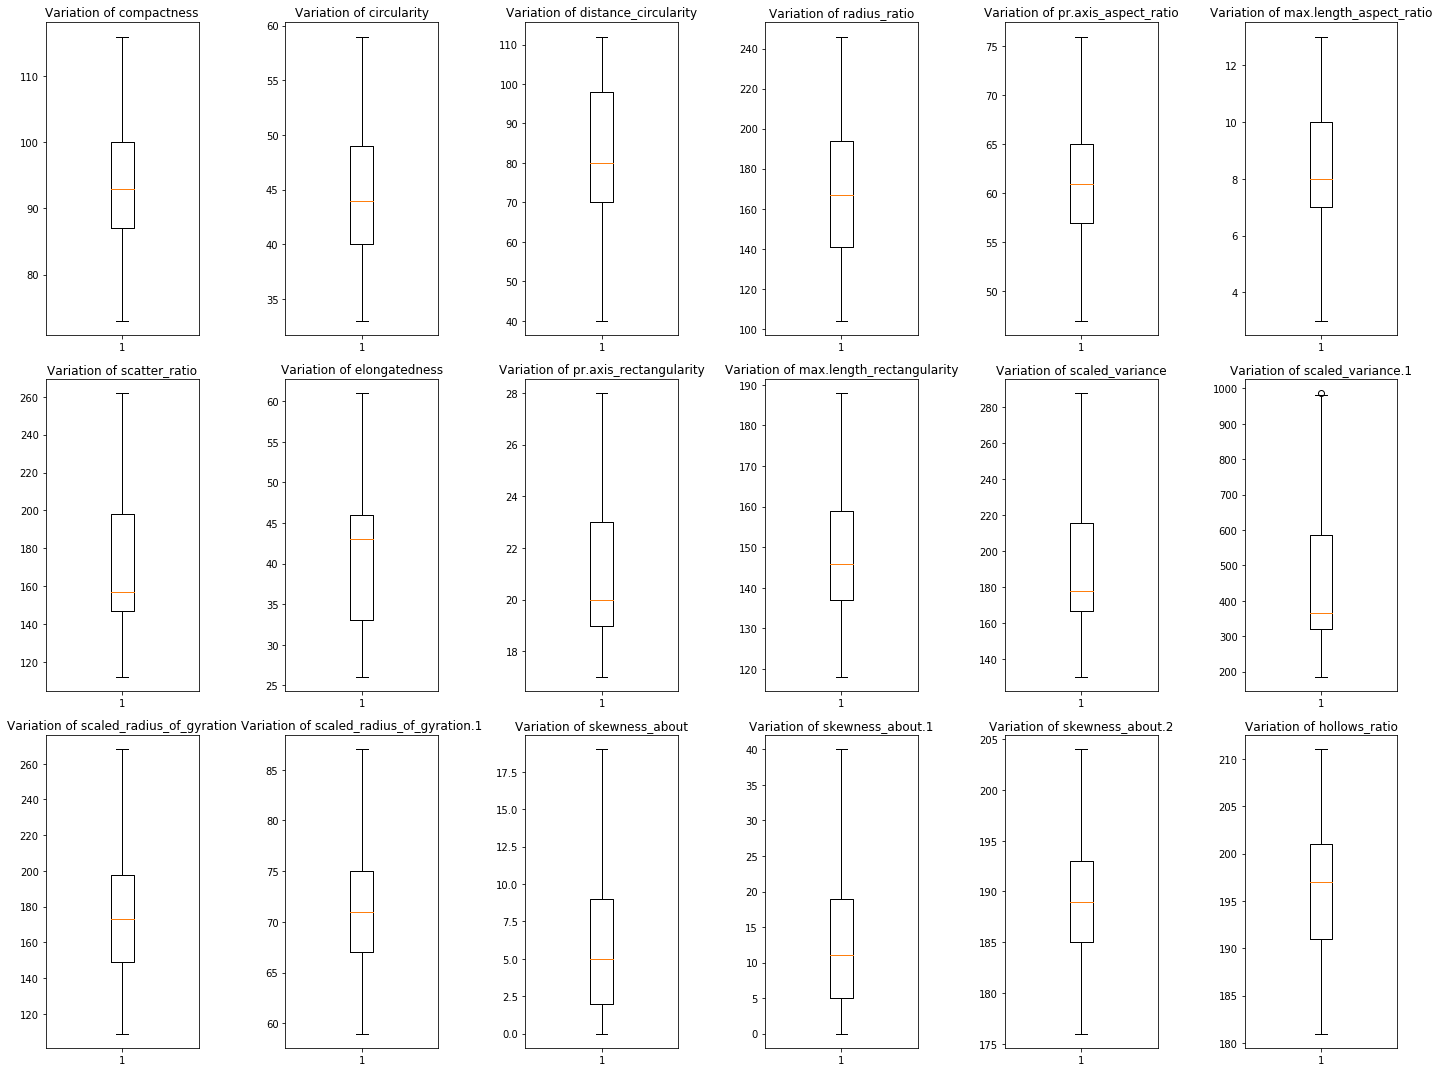

In [17]:
fig,axes=plt.subplots(3,6)
columns =['compactness', 'circularity', 'distance_circularity', 'radius_ratio','pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio','elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',      'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration','scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',       'skewness_about.2', 'hollows_ratio', 'class']
colval = 0
for i in range (3):
    for j in range (6) :
        plot_fld = columns[colval]
        axes[i,j].boxplot(eda_data[plot_fld])
        axes[i,j].set_title('Variation of '+plot_fld)
        colval = colval+1
fig=plt.gcf()
fig.set_size_inches(20,15)
fig.tight_layout()

## 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

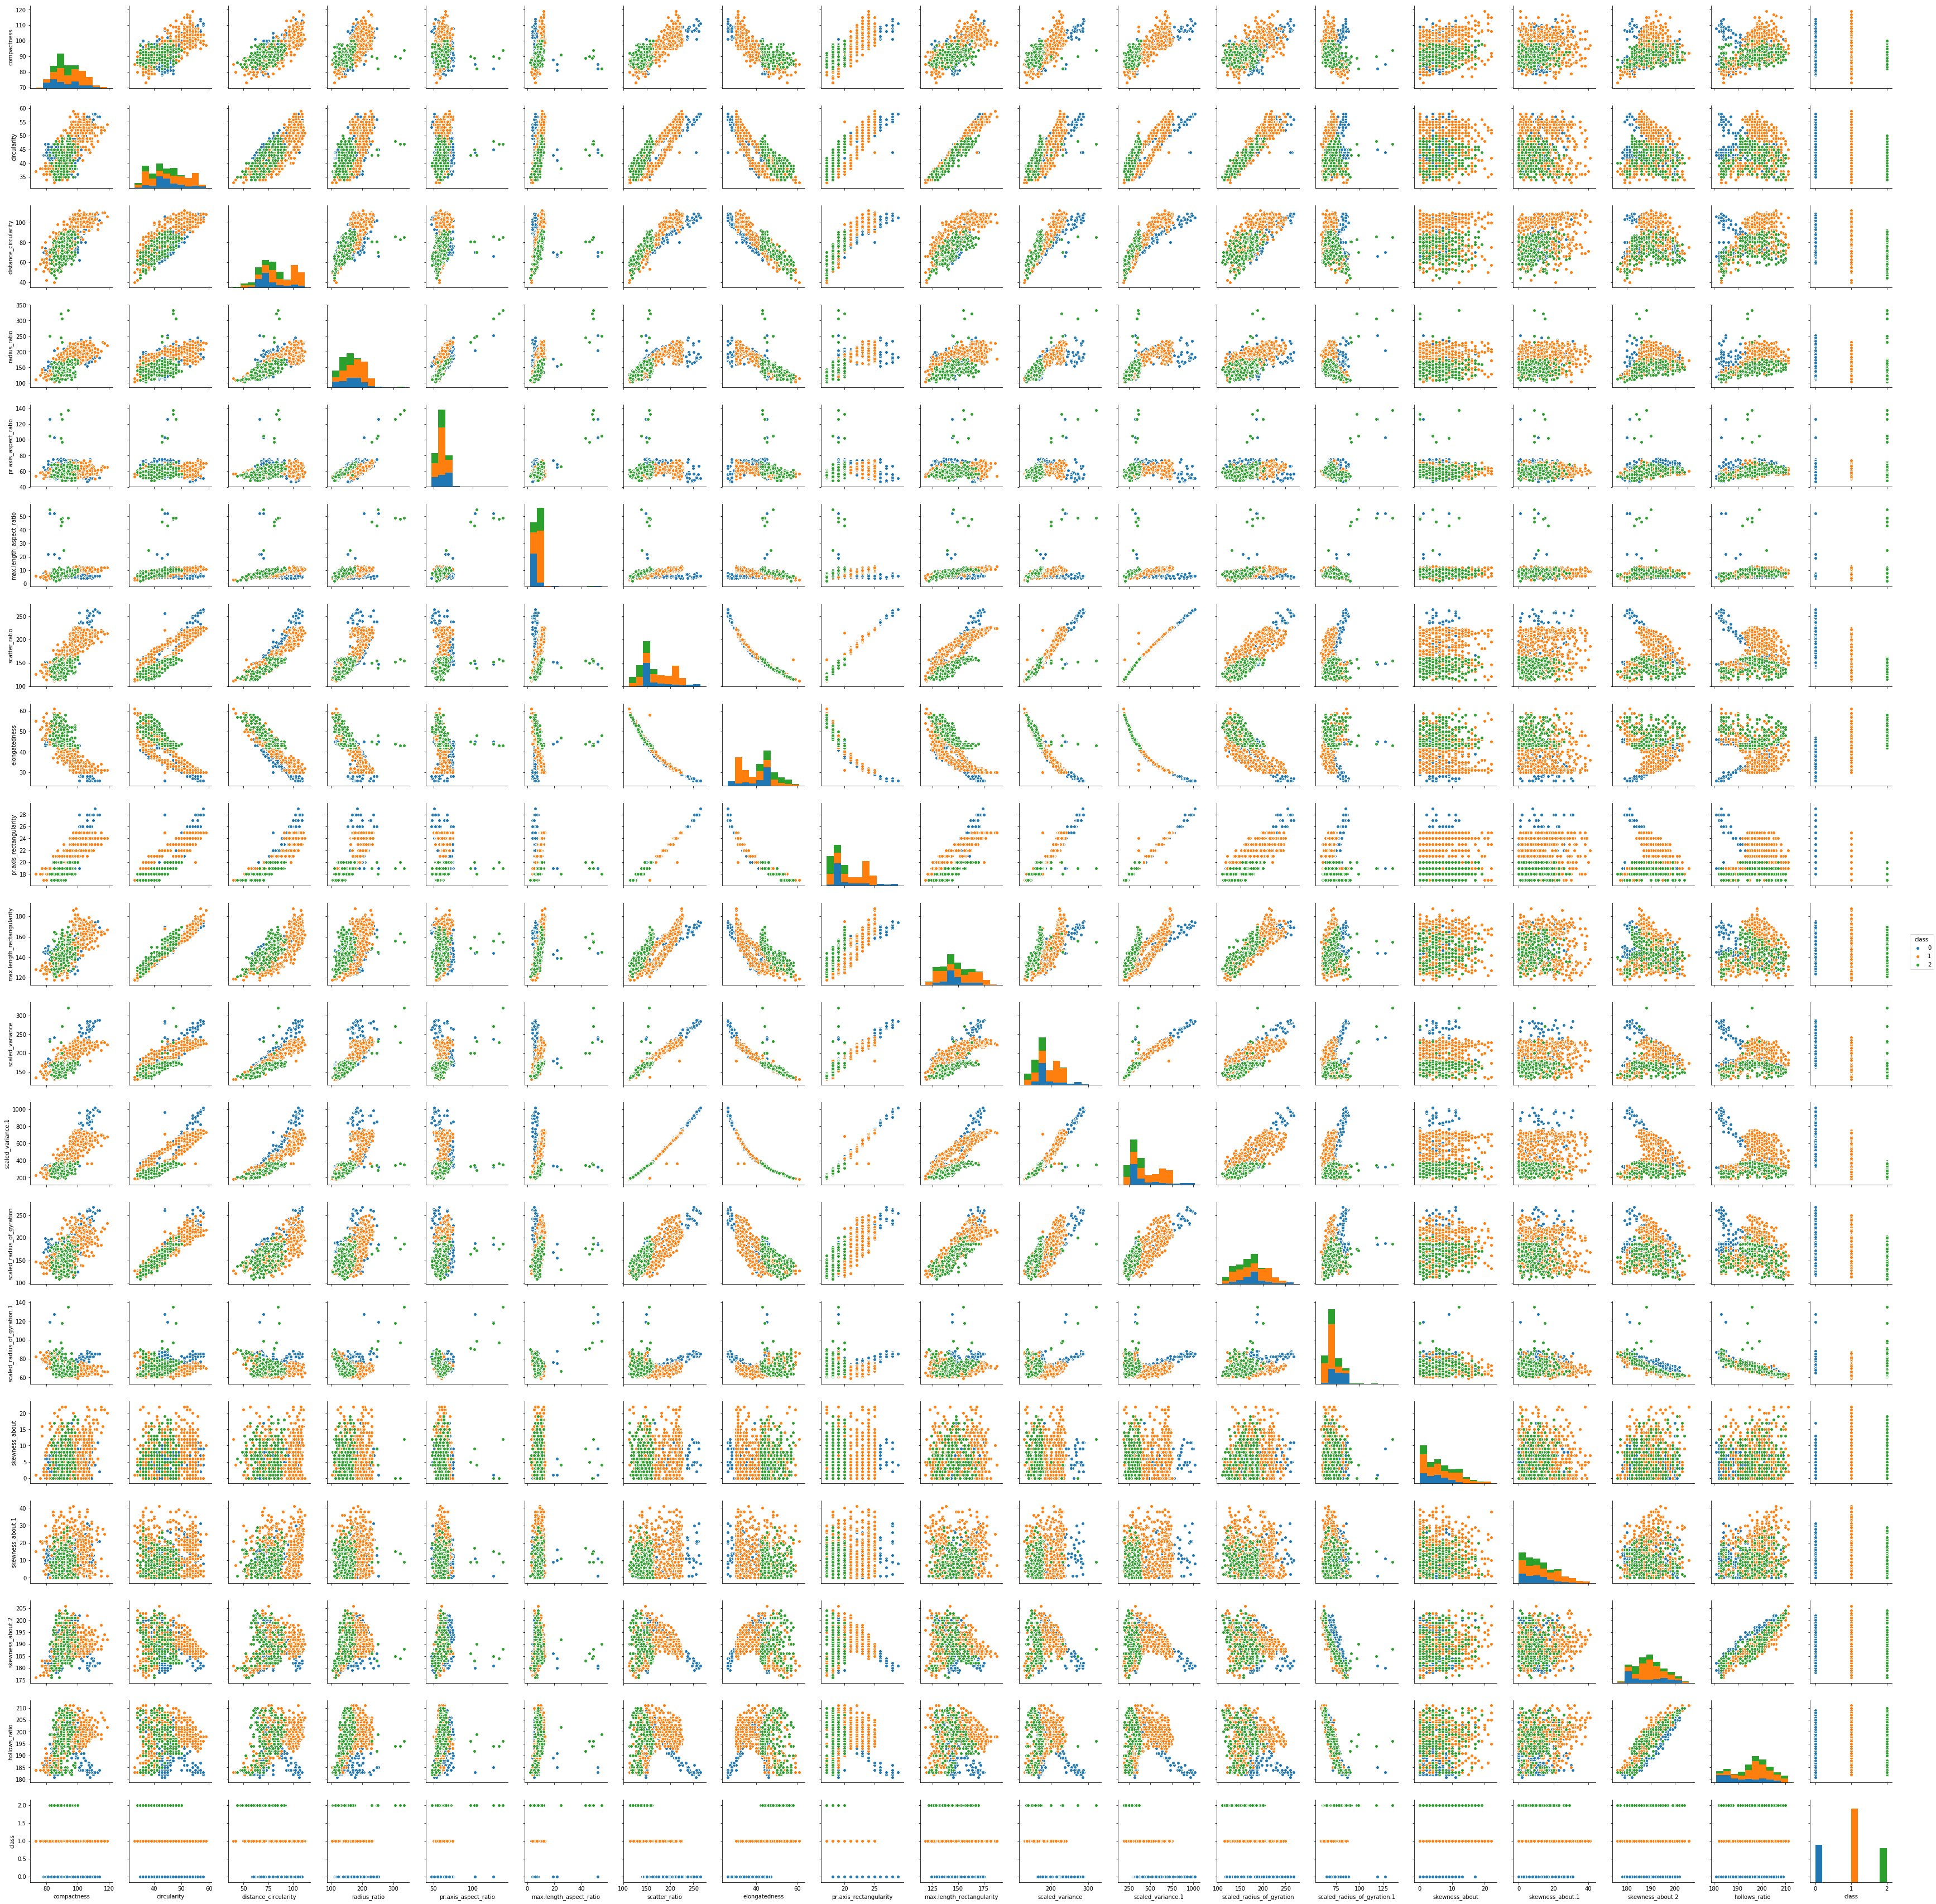

In [18]:
sns.pairplot(vehicle_df,hue = 'class')

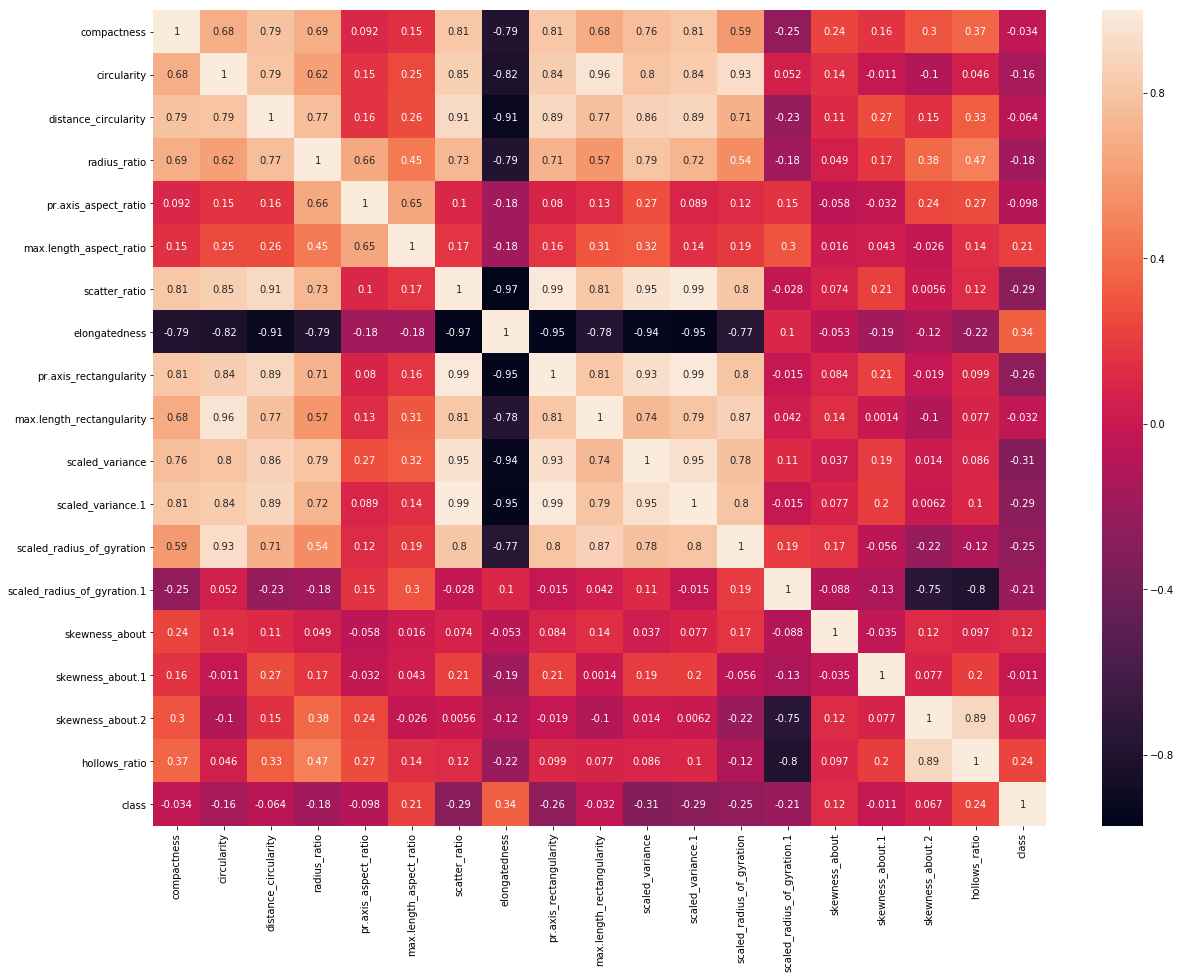

In [19]:
plt.subplots(figsize = (20,15))
sns.heatmap(vehicle_df.corr(), annot= True)

In [20]:
X = eda_data.drop('class',axis = 1)
y = eda_data['class']

## 3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points

### Data Pre-processing before implementing PCA.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
vehicle_scaled = scaler.fit_transform(X)
columns =['compactness', 'circularity', 'distance_circularity', 'radius_ratio','pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio','elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',      'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration','scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',       'skewness_about.2', 'hollows_ratio']
vehicle_scaled_df = pd.DataFrame(vehicle_scaled, columns = columns)

In [22]:
vehicle_scaled_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.172252     0.524273              0.054413      0.320514   
1    -0.324348    -0.621958              0.118805     -0.852833   
2     1.289602     0.851768              1.535438      1.303589   
3    -0.076048    -0.621958             -0.009980     -0.282015   
4     1.662052    -0.130716              1.535438      0.130242   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.923745                 0.917511      -0.210249   
1             -0.743688                 0.429013      -0.607056   
2              0.856772                 0.917511       1.163315   
3              0.323285                 0.429013      -0.759675   
4             -1.988490                -1.036481       2.628450   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.143541               -0.226542                   0.763046   
1       0.532106               -0.618411                  -0.342266   
2      -1.151676                0.949066                   0.693964   
3       0.661628               -0.618411                  -0.342266   
4      -1.928806                2.908414                   1.453866   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.393996          -0.345187                   0.297468   
1        -0.592152          -0.626997                  -0.505992   
2         1.158224           1.127127                   1.409952   
3        -0.922412          -0.747772                  -1.463965   
4         3.040704           2.979021                   2.769655   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.323897       -0.038246          0.379490   
1                    -0.000795        0.609548          0.155190   
2                     0.160756        1.689205         -0.405562   
3                    -1.454753       -0.038246         -0.293412   
4                     2.099367       -0.254177         -0.405562   

   skewness_about.2  hollows_ratio  
0         -0.324770       0.176759  
1          0.002617       0.449185  
2         -0.161076       0.040546  
3          1.639554       1.538891  
4         -1.306932      -1.730226

In [23]:
cov_matrix = np.cov(vehicle_scaled_df.T)
e_vals, e_vecs = np.linalg.eig(cov_matrix)
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-2.72251046e-01 -8.97284818e-02  2.26045073e-02  1.30419032e-01
  -1.52324139e-01  2.58374578e-01 -1.88794221e-01 -7.71578238e-01
  -3.61784776e-01 -1.25233628e-01  2.92009470e-02  7.62442008e-04
  -1.06680587e-02  1.05983722e-02 -1.01407495e-01 -1.46326861e-01
  -3.81638532e-03  3.32992130e-03]
 [-2.85370045e-01  1.33173937e-01  2.10809943e-01 -2.06785531e-02
   1.39022591e-01 -6.88979940e-02  3.90871235e-01 -6.60528436e-02
  -4.62957583e-02  2.40262612e-01  7.29503235e-02  1.93799916e-01
  -7.74670931e-03 -8.71766559e-02 -3.11337823e-01  1.96463651e-01
  -2.96230720e-01  5.83996136e-01]
 [-3.01486231e-01 -4.40259591e-02 -7.08780817e-02  1.07425217e-01
   8.07335409e-02 -2.04800896e-02 -1.76384547e-01  2.98693883e-01
  -2.64499195e-01 -9.42971834e-02  7.78755026e-01 -2.32649049e-01
   1.11905744e-02  2.28724292e-02  5.89166755e-02  5.33931974e-02
   9.72735293e-02  8.64160083e-02]
 [-2.72594510e-01 -2.04232234e-01 -4.02139629e-02 -2.52957341e-01
  -1.19012554e-01 -1.39

In [24]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.33850121  73.07712653  79.78403645  86.09068965  91.0639364
  94.71662207  96.50917296  97.76821471  98.39378701  98.81663795
  99.1597671   99.40525421  99.571671    99.72022979  99.82817322
  99.9264921   99.9826541  100.        ]


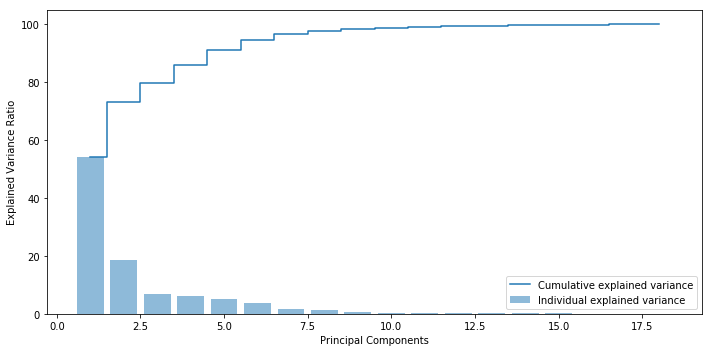

In [25]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = .5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

Text(0.5,0,'Principal Components')

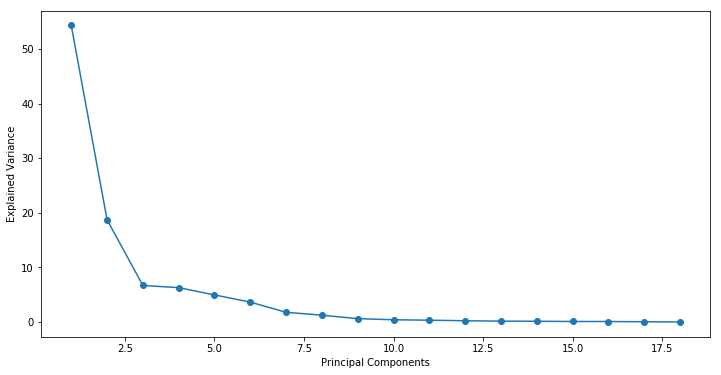

In [26]:
pca_comp = np.arange(1, len(e_vals)+1)
plt.figure(figsize=(12,6))
plt.plot(pca_comp, var_exp, marker = "o" )
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')

#### k = 7 (PCA Components) seem to account for 96% cumulative variance from above two plots

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(vehicle_scaled_df)
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7'])

In [28]:
var= pca.explained_variance_ratio_
var

array([0.54338501, 0.18738625, 0.0670691 , 0.06306653, 0.04973247,
       0.03652686, 0.01792551])

Text(0.5,0,'Principal Components')

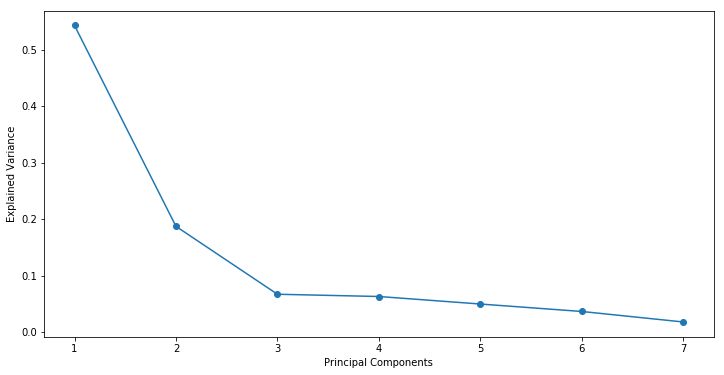

In [29]:
pca_comp = np.arange(1,8)
plt.figure(figsize=(12,6))
plt.plot(pca_comp, var, marker = "o" )
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')

# 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. 

In [30]:
X = eda_data.drop('class',axis = 1)
y = eda_data['class']

In [31]:
from sklearn.model_selection import train_test_split

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [32]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= 0.01, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)

In [33]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9569230769230769
0.9754601226993865


In [34]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[29  0  0]
 [ 1 99  1]
 [ 1  1 31]]


In [35]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

In [36]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

1.0
0.6134969325153374


In [37]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= 0.05, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)

In [38]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9753846153846154
0.9754601226993865


In [39]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

In [40]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

1.0
0.6134969325153374


In [41]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= 0.5, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)

In [42]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9830769230769231
0.9754601226993865


In [43]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

In [44]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

1.0
0.6134969325153374


In [45]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= 1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)

In [46]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9846153846153847
0.9754601226993865


In [47]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

In [48]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

1.0
0.6134969325153374
